In [4]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import pandas as pd

In [5]:
transform = transforms.Compose([
    transforms.Resize((64, 64)), 
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

In [6]:
data_dir = '/Users/amansharma/Documents/Acads/STA 380 Intro to ML/David Part 2/Questions/EuroSAT_RGB'
#Loading data from a local directory. Replace it with your directory
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

In [33]:
# Get the total number of samples
num_samples = len(dataset)

# Calculate the size of the training set (80%)
train_size = int(0.8 * num_samples)

# Calculate the size of the test set (20%)
test_size = num_samples - train_size

# Create the train and test splits
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [47]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 39.1 MB/s eta 0:00:0000:0100:01


In [51]:
import cv2
import PIL.Image as Image

# Load an image
img_path = '/Users/amansharma/Documents/Acads/STA 380 Intro to ML/David Part 2/Questions/EuroSAT_RGB/AnnualCrop/AnnualCrop_4.jpg' 

# Using OpenCV
img_cv = cv2.imread(img_path)
height, width, channels = img_cv.shape
print("OpenCV: Height =", height, "Width =", width, "Channels =", channels)


OpenCV: Height = 64 Width = 64 Channels = 3


#### Each image is 64 by 64 px, in RGB

In [35]:
# Hyperparameters for data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 64, 64])
torch.Size([32])
tensor([8, 9, 9, 6, 3, 6, 1, 7, 1, 6, 4, 8, 2, 4, 0, 1, 9, 3, 8, 9, 9, 6, 4, 3,
        6, 7, 5, 6, 2, 1, 5, 2])


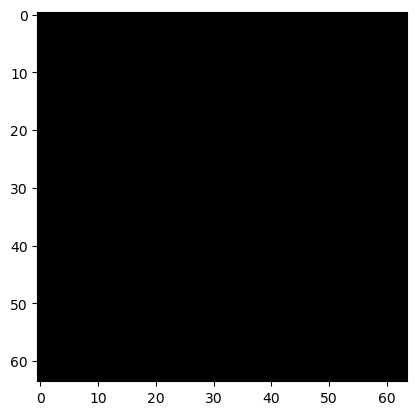

In [39]:
# Get the first batch from the train loader
images, labels = next(iter(train_loader))

# Print the shape of the images and labels
print(images.shape)  # Output: torch.Size([batch_size, channels, height, width])
print(labels.shape)  # Output: torch.Size([batch_size])
print(labels)

# Visualize a few images
import matplotlib.pyplot as plt

# Assuming 3 channels (RGB)
plt.imshow(images[0].permute(1, 2, 0))  # Permute to correct shape for plotting
plt.show()

#### Output Size Calculation: <br>
Output size = (Input size − Kernel size + (2 × Padding)) / Stride ) + 1


In [19]:
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=0)  # Output: 16x62x62
        self.relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Output: 32x60x60
        self.relu2 = nn.ReLU()
        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)  # Output: 64x58x58
        self.relu3 = nn.ReLU()
        
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Output: 64x28x28
        
        self.flatten = nn.Flatten()
        
        # Adjust input size based on the pooled dimensions
        self.fc1 = nn.Linear(64 * 28 * 28, 120)  # Input: 64x28x28 -> 50176 features
        self.relu4 = nn.ReLU()
        
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.conv3(out)
        out = self.relu3(out)
        out = self.pool3(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.relu4(out)
        out = self.fc2(out)
        return out

net = CNNModel()
print(net)

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=120, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


### Design calls taken
-  Using three layers, to allow CNN to capture deeper patters
-  Using a max pooling layer to reduce noise before flattening
-  Outputting into a 10 length tensor, which should contain probabilities of each possible outcome

In [23]:
import torch.optim as optim
import tqdm

# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())



In [99]:
import os

def get_folder_names(data_dir):

  folder_names = []
  for root, dirs, files in os.walk(data_dir):
    folder_names.extend(dirs)
    break  # Only process the top-level directory

  return folder_names

# Example usage:
data_dir = '/Users/amansharma/Documents/Acads/STA 380 Intro to ML/David Part 2/Questions/EuroSAT_RGB'
folder_list = get_folder_names(data_dir)
print(folder_list)

['Forest', 'River', 'Highway', 'AnnualCrop', 'SeaLake', 'HerbaceousVegetation', 'Industrial', 'Residential', 'PermanentCrop', 'Pasture']


## Training for illustration purposes

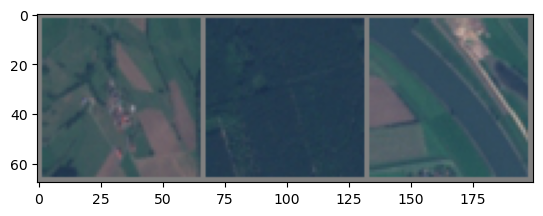

Predicted: HerbaceousVegetation AnnualCrop HerbaceousVegetation


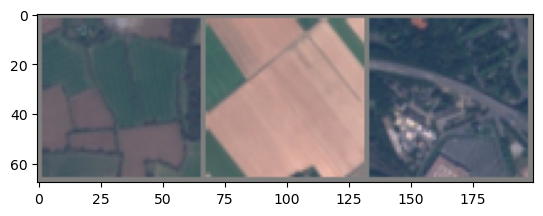

Predicted: HerbaceousVegetation HerbaceousVegetation AnnualCrop


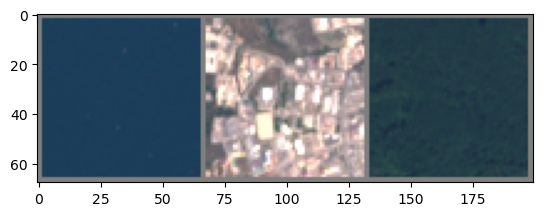

Predicted: AnnualCrop HerbaceousVegetation AnnualCrop


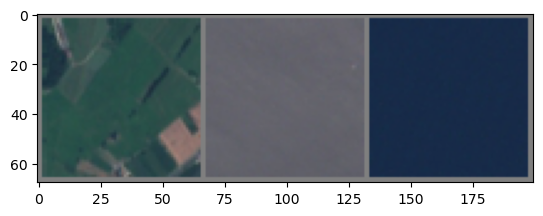

Predicted: AnnualCrop HerbaceousVegetation AnnualCrop
Epoch 1, Loss: 2.3091952581758854


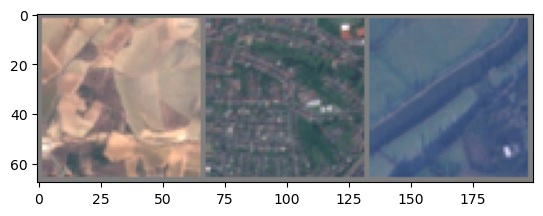

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation


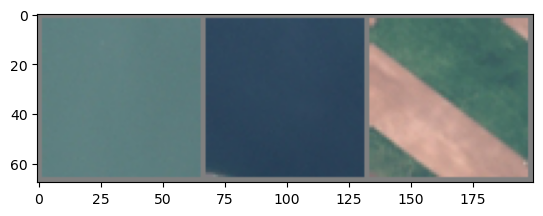

Predicted: HerbaceousVegetation AnnualCrop HerbaceousVegetation


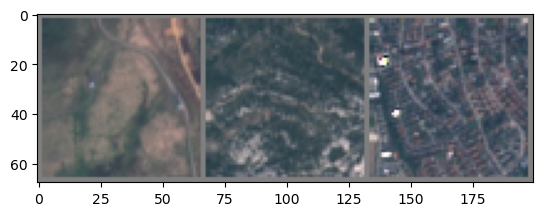

Predicted: AnnualCrop AnnualCrop HerbaceousVegetation


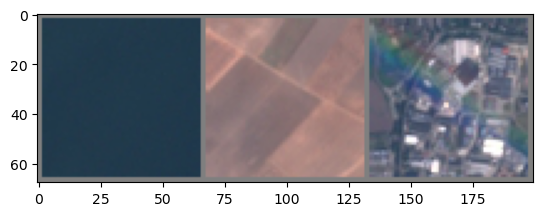

Predicted: AnnualCrop HerbaceousVegetation HerbaceousVegetation
Epoch 2, Loss: 2.3091952588823106
Finished Training


In [112]:

# Function to display a sample of images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



# Number of training epochs
num_epochs = 2

testiter = iter(test_loader)
# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 200 == 0:
            with torch.no_grad():
                # Show a sample of images from the test data and model's predictions
                test_images, test_labels = next(testiter)
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                imshow(torchvision.utils.make_grid(test_images[:3].cpu()))
                test_outputs = net(test_images[:3])
                _, predicted = torch.max(test_outputs, 1)
                print('Predicted:', ' '.join(folder_list[predicted[j]] for j in range(3)))

    # Print average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1)}")


print('Finished Training')


## Retraining the model - this one is for performance, previous one was for illustration

In [115]:

# Create the model instance
net = CNNModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Adjust learning rate as needed

# Set device (GPU if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Training loop with verbose output
def train_model(num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        total_steps = len(train_loader)
        
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Print progress within epoch
            if (i+1) % 100 == 0 or (i+1) == total_steps:  # Print every 100 steps or last step
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {running_loss/(i+1)}')
            
        # Print epoch-level performance
        print(f'Epoch {epoch + 1} complete, Average Loss: {running_loss / len(train_loader)}')

# Evaluation function
def evaluate_model(model, data_loader):
    correct = 0
    total = 0
    confusion_matrix = torch.zeros(10, 10, dtype=torch.int64)  # Assuming 10 classes

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

    print('Accuracy on test set: %d %%' % (100 * correct / total))
    return confusion_matrix

# Train the model
num_epochs = 10  # Adjust number of epochs as needed
train_model(num_epochs)

# Evaluate the model on the test set
confusion_matrix = evaluate_model(net, test_loader)
print(confusion_matrix)

Epoch [1/10], Step [100/675], Loss: 1.5403557044267655
Epoch [1/10], Step [200/675], Loss: 1.3402754735946656
Epoch [1/10], Step [300/675], Loss: 1.2266114936272303
Epoch [1/10], Step [400/675], Loss: 1.1354588128626346
Epoch [1/10], Step [500/675], Loss: 1.064094842016697
Epoch [1/10], Step [600/675], Loss: 1.0071589419742426
Epoch [1/10], Step [675/675], Loss: 0.9749844119725404
Epoch 1 complete, Average Loss: 0.9749844119725404
Epoch [2/10], Step [100/675], Loss: 0.5511392584443092
Epoch [2/10], Step [200/675], Loss: 0.5557334105670452
Epoch [2/10], Step [300/675], Loss: 0.5422894824544588
Epoch [2/10], Step [400/675], Loss: 0.5350033459067345
Epoch [2/10], Step [500/675], Loss: 0.5259863875210286
Epoch [2/10], Step [600/675], Loss: 0.5215555920948585
Epoch [2/10], Step [675/675], Loss: 0.5149760156207615
Epoch 2 complete, Average Loss: 0.5149760156207615
Epoch [3/10], Step [100/675], Loss: 0.2912149948999286
Epoch [3/10], Step [200/675], Loss: 0.29226520663127303
Epoch [3/10], Step

In [144]:
confusion_df = pd.DataFrame(confusion_matrix.numpy(), index=folder_list, columns=folder_list)
confusion_df_normalized = (confusion_df.div(confusion_df.sum(axis=1), axis=0)*100).round(2)

confusion_df_normalized.columns = ['Pred_' + str(col) for col in confusion_df_normalized.columns]
confusion_df_normalized.index = ['Act_' + str(row) for row in confusion_df_normalized.index]
confusion_df_normalized

,Pred_Forest,Pred_River,Pred_Highway,Pred_AnnualCrop,Pred_SeaLake,Pred_HerbaceousVegetation,Pred_Industrial,Pred_Residential,Pred_PermanentCrop,Pred_Pasture
Act_Forest,79.31,0.49,2.13,3.45,0.00,1.81,3.61,0.33,7.72,1.15
Act_River,0.00,93.79,0.34,0.00,0.00,5.00,0.00,0.00,0.86,0.00
Act_Highway,1.13,2.11,67.59,5.02,2.11,2.76,9.72,6.81,2.59,0.16
Act_AnnualCrop,2.83,0.00,5.66,61.82,5.45,1.21,8.28,4.85,9.90,0.00
Act_SeaLake,0.00,0.00,0.80,2.01,88.96,0.00,2.01,4.42,1.81,0.00
Act_HerbaceousVegetation,0.25,1.76,4.03,3.02,0.00,72.04,6.05,1.01,11.34,0.50
Act_Industrial,4.53,0.00,12.80,9.65,1.57,3.74,61.61,4.13,1.97,0.00
Act_Residential,0.00,0.00,0.34,0.85,3.38,0.00,0.34,95.09,0.00,0.00
Act_PermanentCrop,2.20,1.40,3.61,13.43,1.40,1.60,1.60,1.60,72.95,0.20
Act_Pasture,0.66,1.49,0.50,0.00,0.00,0.50,0.00,0.00,0.99,95.87


#### Model does the most well in classifying Rivers, Pasture, Residential areas
#### Overall test accuracy is 79%

In [148]:
predicted

tensor([3, 5, 5])

In [150]:
images

tensor([[[[-0.4275, -0.3333, -0.0902,  ..., -0.6000, -0.6078, -0.6157],
          [-0.3961, -0.3569, -0.1451,  ..., -0.6000, -0.5922, -0.6000],
          [-0.3176, -0.3176, -0.3255,  ..., -0.6157, -0.6078, -0.6235],
          ...,
          [-0.3176, -0.3020, -0.3333,  ..., -0.0353, -0.0275, -0.0118],
          [-0.3333, -0.3098, -0.3725,  ..., -0.0353, -0.0275, -0.0275],
          [-0.3725, -0.3569, -0.3882,  ..., -0.0196, -0.0275, -0.0353]],

         [[-0.1843, -0.2314, -0.1137,  ..., -0.3961, -0.3882, -0.3882],
          [-0.2000, -0.2235, -0.0902,  ..., -0.3961, -0.3882, -0.3961],
          [-0.1608, -0.1608, -0.1765,  ..., -0.4118, -0.4275, -0.4431],
          ...,
          [-0.1373, -0.1608, -0.2157,  ...,  0.0980,  0.0902,  0.0745],
          [-0.1765, -0.1922, -0.2627,  ...,  0.0902,  0.0902,  0.0824],
          [-0.2627, -0.2706, -0.3098,  ...,  0.0980,  0.0902,  0.0824]],

         [[-0.1451, -0.1686, -0.0588,  ..., -0.2941, -0.2941, -0.2784],
          [-0.1451, -0.1686, -

### Sample predictions of the final model on a sample of test data

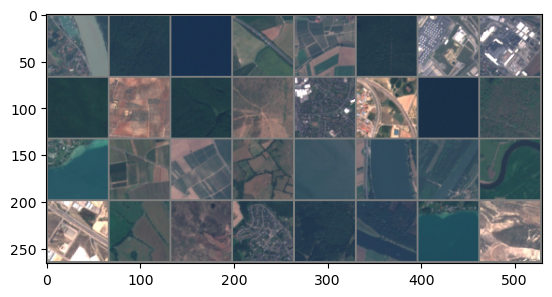

In [179]:
imshow(torchvision.utils.make_grid(images.cpu()))

In [181]:
[folder_list[x] for x in torch.argmax(outputs.data, dim=1)]

['HerbaceousVegetation',
 'HerbaceousVegetation',
 'AnnualCrop',
 'AnnualCrop',
 'HerbaceousVegetation',
 'HerbaceousVegetation',
 'AnnualCrop',
 'HerbaceousVegetation',
 'HerbaceousVegetation',
 'HerbaceousVegetation',
 'HerbaceousVegetation',
 'AnnualCrop',
 'HerbaceousVegetation',
 'HerbaceousVegetation',
 'AnnualCrop',
 'AnnualCrop',
 'HerbaceousVegetation',
 'AnnualCrop',
 'AnnualCrop',
 'HerbaceousVegetation',
 'HerbaceousVegetation',
 'AnnualCrop',
 'HerbaceousVegetation',
 'HerbaceousVegetation',
 'AnnualCrop',
 'AnnualCrop',
 'HerbaceousVegetation',
 'HerbaceousVegetation',
 'AnnualCrop',
 'HerbaceousVegetation',
 'AnnualCrop',
 'HerbaceousVegetation']